# An analysis of Japanese Anime: An In-Depth IMDB Data Set

### Purpose
    - Initially, make an Exploratory Data Analysis (EDA) based on genre popularity and year-wise trends; 
    - Make a Time-Series Analysis, how ratings evolve over time for long-running series;
    - Present those informations and other relevant ones on an interactive dashboard, allowing users to filter by various criteria.

### About the data set
    The data set provides a comprehensive view of various animations listed on IMDb that are categorized under the genre "Animation" and originate from Japan. It includes details such as the title, genre, user rating, number of votes, runtime, year of release, summary, stars, certificate, metascore, gross earnings, episode flag, and episode title when applicable.

### Detailed Column Introduction
    - Title: The name of the animation.
    - Genre: The genre(s) under which the animation falls, e.g., Action, Adventure, etc.
    - User Rating: The IMDb user rating out of 10.
    - Number of Votes: The total number of IMDb users who have rated the animation.
    - Runtime: The duration of the animation in minutes.
    - Year: The year the animation was released or started airing.
    - Summary: A brief or full summary of the animation's plot. Full summaries are fetched when available.
    - Stars: List of main actors or voice actors involved in the animation.
    - Certificate: The certification of the animation, e.g., PG, PG-13, etc.
    - Metascore: The Metascore rating, if available, which is an aggregated score from various critics.
    - Gross: The gross earnings or box office collection of the animation.
    - Episode: A binary flag indicating whether the listing is for an episode of a series (1 for yes, 0 for no).
    - Episode Title: The title of the episode if the listing is for an episode; otherwise, it will be None.

Data set link: https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb

### Exploratory Data Analysis (EDA)

##### Load the data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data = pd.read_csv(f'data/imdb_anime.csv')
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


##### Year of production

In [79]:
# Take the initial production year by removing brackets and non-numeric characters
data['Init_year'] = data['Year'].str.replace('[^0-9]', '', regex=True)

# Take only the first 4 digits
data['Init_year'] = data['Init_year'].str[:4]

# Convert to numeric (int) and fill NaN with '0'
data['Init_year'] = pd.to_numeric(data['Init_year'], errors='coerce') # parameter erros='coerce': convert erros to NaN values
data['Init_year'] = data['Init_year'].fillna(0).astype(int)

In [80]:
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title,Init_year
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN,1999
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN,2023
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN,2023
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN,2013
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN,2020


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
 13  Init_year        45717 non-null  int32 
dtypes: int32(1), object(13)
memory usage: 4.7+ MB


<Axes: title={'center': 'Animes released over the years.'}, xlabel='Init_year', ylabel='Count'>

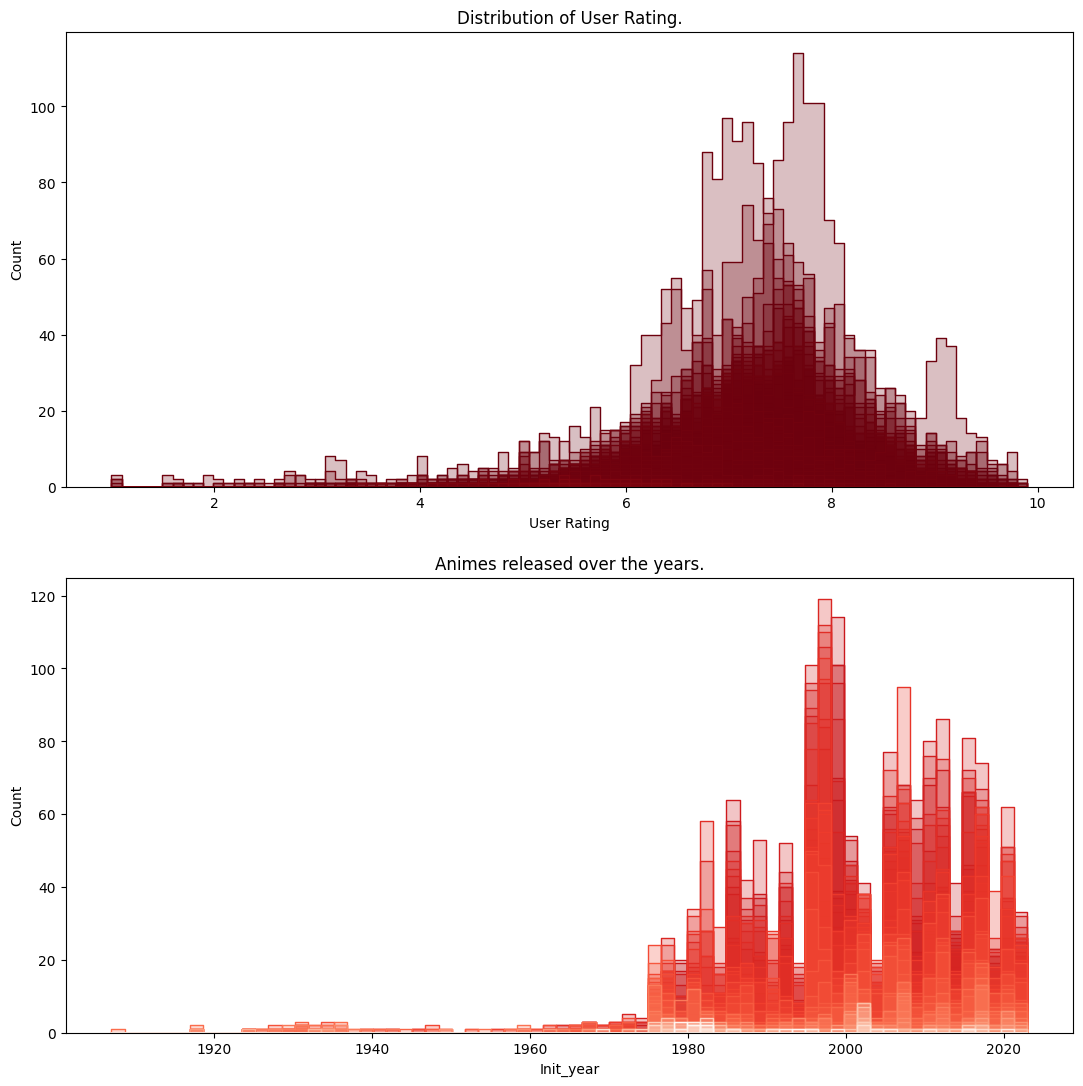

In [82]:
# Convert to numeric and convert errors to NaN
data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

# Plot
fig, (ax1, ax2) = plt.subplots(figsize=(13, 13), nrows=2)
ax1.set_title('Distribution of User Rating.')
ax2.set_title('Animes released over the years.')
sns.histplot(ax=ax1, data=data, x='User Rating', bins=int(1 + 10 * (data['User Rating'].max() - data['User Rating'].min())), hue='Init_year', legend=False, palette='Reds', element='step')
sns.histplot(ax=ax2, data=data, hue='User Rating', bins=70, x='Init_year', legend=False, palette='Reds', element='step')

# Save figure
#plt.savefig(f"graphs/Img1.png")

Observing the graphic "Animes released over the years" could mislead that anime releases are decreasing, but many are ongoing. So, an important informantion is to know how many animes are still ongoing.

##### Ongoing animes

In [83]:
# Use a pattern to find at 'Year' column, animes that are ongoing
# The pattern is four digits with optional hyphen
pattern = r'^\d{4}–\s*?$'

# Replace finished animes with '0'
data['Ongoing'] = data['Year'].str.strip('()')
data['Ongoing'] = data['Ongoing'].apply(lambda x: 'Yes' if pd.notna(x) and pd.Series(x).str.contains(pattern).any() else 'No')

In [84]:
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title,Init_year,Ongoing
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN,1999,Yes
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN,2023,No
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN,2023,No
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN,2013,No
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN,2020,Yes


There are 2396 ongoing animations with the same name ("Sazae-san") with one episode each. This inflates the data, so it's necessary to clean up.

In [85]:
data[data.Title == "Sazae-san"][["Title", "Year", "Ongoing", "Episode"]]

,Title,Year,Ongoing,Episode
1908,Sazae-san,(1969– ),Yes,0
23016,Sazae-san,(1969– ),Yes,1
23816,Sazae-san,(1969– ),Yes,1
23835,Sazae-san,(1969– ),Yes,1
23836,Sazae-san,(1969– ),Yes,1
...,...,...,...,...
32970,Sazae-san,(1969– ),Yes,1
34027,Sazae-san,(1969– ),Yes,1
34063,Sazae-san,(1969– ),Yes,1
39309,Sazae-san,(1969– ),Yes,1


In [86]:
data = data[data['Episode'].str.isnumeric()]

# Convert "Episode" to int
data['Episode'] = data['Episode'].astype(int)

# Filter rows with 'Episode' is different to 1
filtered = data.query("Episode != 1")

# Count the values in 'Ongoing'
count = filtered['Ongoing'].value_counts()

print(count)

Ongoing
No     9093
Yes    1714
Name: count, dtype: int64


There are 145 animations without an year of production and an user rating. It's unnecessary information, clean up.

In [87]:
filtered[filtered['Init_year'] == 0][["Title", "Year", "User Rating", "Init_year"]]

,Title,Year,User Rating,Init_year
241,Coyote v. Acme,NaN,NaN,0
740,Lazarus,NaN,NaN,0
1081,Coyote v. Acme,NaN,NaN,0
1624,Lazarus,NaN,NaN,0
1689,Dragons of Wonderhatch,NaN,NaN,0
...,...,...,...,...
10711,Death and the Maiden,NaN,NaN,0
10750,Pilgrimage-Shinshin Dojo,(Video Game),NaN,0
10777,Bug'z Dream,NaN,NaN,0
32929,Kimi no Koto ga Daidaidaidaidaisuki na 100-nin...,NaN,NaN,0


In [88]:
# Filter rows with 'Init_year' different to 0
filtered = filtered.query('Init_year != 0')

# Show that there are no rows with 'Init_year' equals to 0
filtered[filtered['Init_year'] == 0][["Title", "Year", "User Rating", "Init_year"]]

,Title,Year,User Rating,Init_year


In [89]:
# Save new dataframe
filtered.to_csv(f'data/imdb_anime_enhanced.csv', index=False)

##### Genre popularity

A good way to visualize this information would be using a word cloud. It's important to filter the inflated episodes.

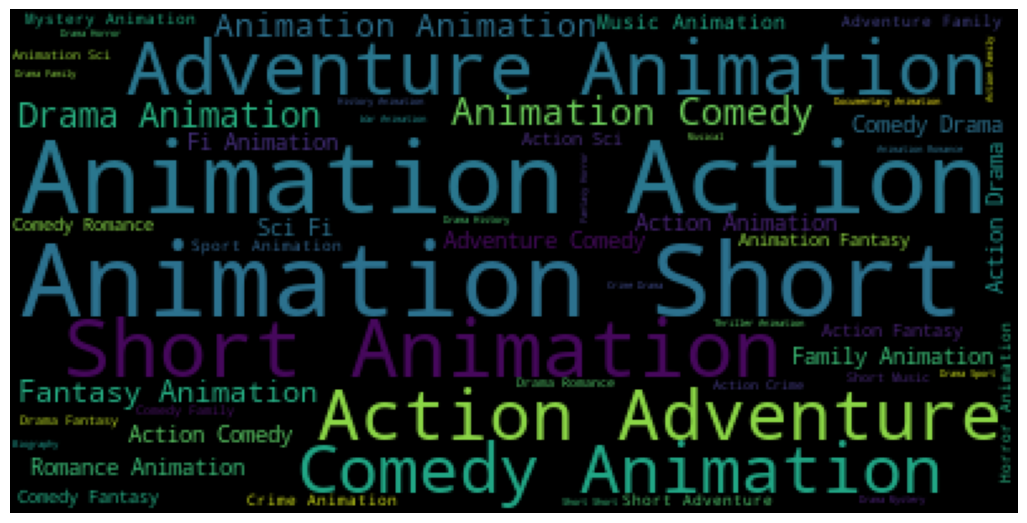

In [90]:
import wordcloud as wd

# Wordcloud plot
plt.figure(figsize=(13, 13))
plt.axis('off')
plt.imshow(wd.WordCloud().generate(' '.join(filtered['Genre'].values.tolist())))

# Save figure
plt.savefig(f'graphs/Img2.png')

### Time-Series Analysis

##### User Rating evolution

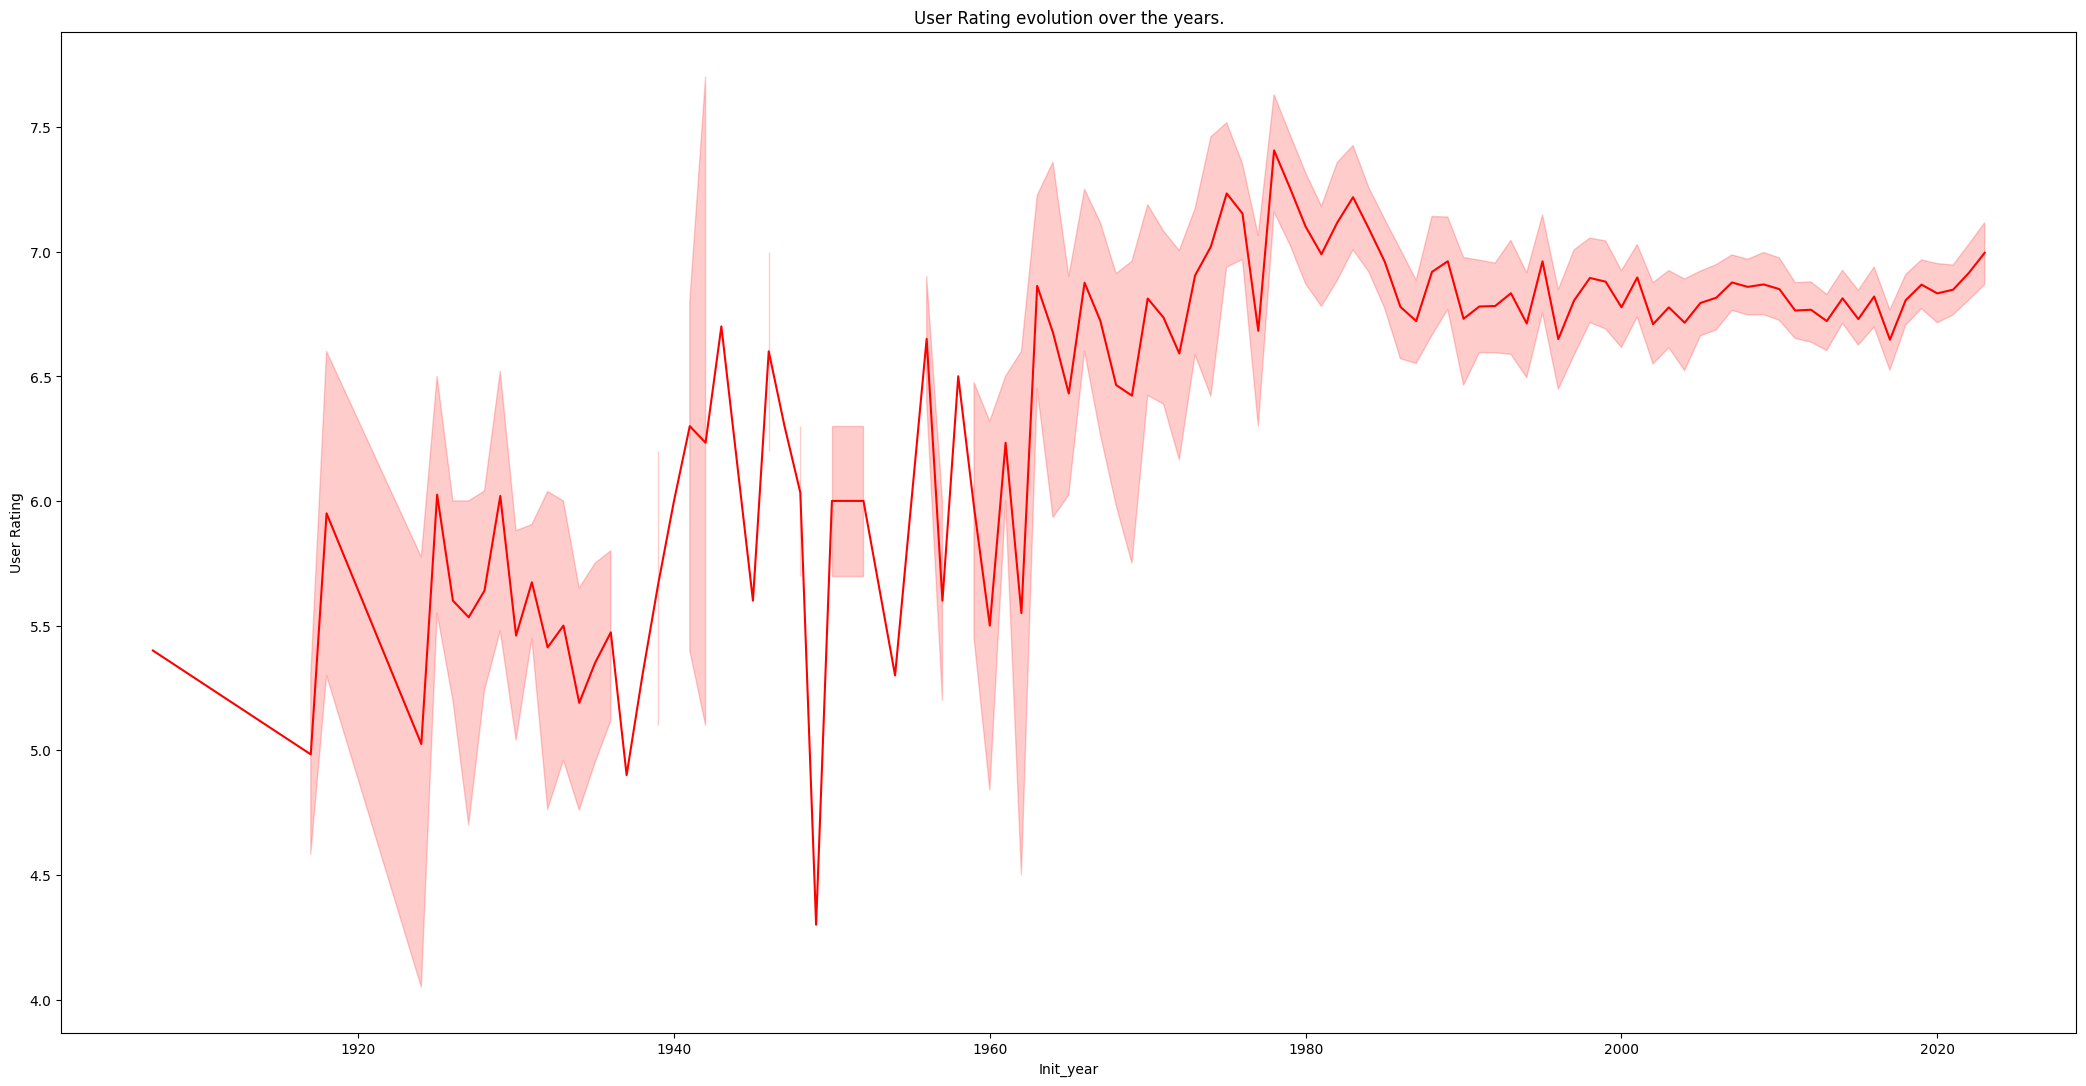

In [91]:
# Plot
plt.figure(figsize=(26, 13))
plt.title("User Rating evolution over the years.")
sns.lineplot(data=filtered, x='Init_year', y='User Rating', color='red')

# Save figure
plt.savefig(f'graphs/Img3.png')

Observing the Time-Series graphic "User Rating evolution over the years", it's evident that User Rating is leading to a collective trend due to Japanese culture export, around the 1960s, when Japan had accelerated economic growth, becoming the second-largest economy in the world.